<a href="https://colab.research.google.com/github/felix018/miniproyecto/blob/main/Miniproyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Miniproyecto1**

Santiago Montoya Londoño

Hanna Isabella Colorado M.

**cc:** 1037672299

**cc:** 1000408557

In [ ]:
#Descarga archivo base de dadtos

#https://drive.google.com/file/d/1cNMil1P60z-XrqExnnKvmggmXWhI3glZ/view?usp=drive_link -> s14.mat
#https://drive.google.com/file/d/1Fu3HL-cB64lTfuZS8iPhIfaJIsl1OszD/view?usp=drive_link -> s15.mat
#https://drive.google.com/file/d/1cBN0CYdrsUsVO77PyNq-Jkyh5pc0FI22/view?usp=drive_link -> s16.mat
#https://drive.google.com/file/d/1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3/view?usp=drive_link -> s17.mat
!gdown '1cNMil1P60z-XrqExnnKvmggmXWhI3glZ'
!gdown '1Fu3HL-cB64lTfuZS8iPhIfaJIsl1OszD'
!gdown '1cBN0CYdrsUsVO77PyNq-Jkyh5pc0FI22'
!gdown '1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3'

Downloading...
From: https://drive.google.com/uc?id=1cNMil1P60z-XrqExnnKvmggmXWhI3glZ
To: /content/s14.mat
100% 80.6M/80.6M [00:00<00:00, 126MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Fu3HL-cB64lTfuZS8iPhIfaJIsl1OszD
To: /content/s15.mat
100% 80.7M/80.7M [00:00<00:00, 127MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cBN0CYdrsUsVO77PyNq-Jkyh5pc0FI22
To: /content/s16.mat
100% 80.8M/80.8M [00:01<00:00, 62.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3
To: /content/s17.mat
100% 80.7M/80.7M [00:02<00:00, 35.4MB/s]


##**Base de datos**
Para este proyecto se hace uso de la base de datos DEAPdataset la cual contiene multiples señales fisiológicas y ensefalográficas de una persona al reaccionar a un video en concreto; a su vez se hace uso de información adiconal proporcionada que permite clasificar la emocion de la persona frente a un video en particular.

Para este caso se hara el análisis para 4 personar donde la informacion para cada uno se presenta de la siguiente manera:


|Array name	|Array shape	|Array contents|
|-----------|-------------|--------------|
|data	|40 x 40 x 8064	|video/trial x channel x data|
|labels	|40 x 4	|video/trial x label (valence, arousal, dominance, liking)|

En data esta almacenada las señales resultantes en los canales al reaccionar a cada video, y en labels para cada video esta la medida de la valenicia y el arousal en una escala del 1 al 9 que nos permite clasicar la emocion de la persona.

De los canales se extraeran caracteristicas para clasificarlos posteriormente por emocion relacionadolas entre si mediante pairplots los cuales nos da una idea de la dependencia de los datos de acuerdo a las caracteristicas seleccionadas.

Cada canal contiene una determinada señal:

|Channel N° |Channel content |
|-----------|----------------|
|1|	Fp1|
|2| AF3|
|3|	F3|
|4| F7|
|5|	FC5|
|6|	FC1|
|7|	C3|
|8|	T7|
|9|	CP5|
|10| CP1|
|11| P3|
|12| P7|
|13| PO3|
|14| O1|
|15| Oz|
|16| Pz|
|17| Fp2|
|18| AF4|
|19| Fz|
|20| F4|
|21| F8|
|22| FC6|
|23| FC2|
|24| Cz|
|25| C4|
|26| T8|
|27| CP6|
|28| CP2|
|29| P4|
|30| P8|
|31| PO4|
|32| O2|
|33| hEOG (horizontal EOG, hEOG1 - hEOG2)|
|34| vEOG (vertical EOG, vEOG1 - vEOG2)|
|35| zEMG (Zygomaticus Major EMG, zEMG1 - zEMG2)|
|36| tEMG (Trapezius EMG, tEMG1 - tEMG2)|
|37| GSR (values from Twente converted to Geneva format (Ohm))|
|38| Respiration belt|
|39| Plethysmograph|
|40| Temperature|

Cada señal tiene una frecuencia de muestreo de 128Hz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
import scipy.signal as signal
import seaborn as sns
import pandas as pd

In [ ]:
def spectralpower(biosignal, filtertype, band, fs):
  wn=2*band/fs
  filter=signal.butter(7, wn, btype=filtertype, analog=False, fs=fs, output='sos')   #filtrado butterworth
  filtered = signal.sosfilt(filter, biosignal)

  f, t, Zxx = signal.stft(filtered, fs, nperseg=512) # generar STFT
  power=(np.abs(Zxx)**2)/len(Zxx)   #potencia espectral
  power=np.sort(power, axis=None)
  power=power[-10:]    #seleccion de las 10 potencias mas grandes
  return power

def caracteristicas(signal1):   #40x6528
  GSR=signal1[36,:]
  xGSR=[]
  media=np.mean(GSR)
  xGSR.append(media)
  derivative=np.mean(np.diff(GSR))       #Caracteristicas GSR
  xGSR.append(derivative)

  power=spectralpower(GSR,'lowpass',2.4, 128)
  xGSR=np.concatenate((xGSR,power))

  xPleth=[]
  pleth=signal1[38,:]
  media=np.mean(pleth)
  des=np.std(pleth)
  xPleth.append(media)
  xPleth.append(des)
  media=np.mean(np.diff(pleth))    #Caracteristicas pletismografia
  des=np.std(np.diff(pleth))
  xPleth.append(media)
  xPleth.append(des)

  power=spectralpower(pleth,'bandpass',np.array([0.2, 0.3]), 128)
  xPleth=np.concatenate((xPleth,power))

  xRes=[]
  res=signal1[37,:]
  derivative=np.mean(np.diff(res))
  xRes.append(derivative)

  peaks,_=signal.find_peaks(res,distance=128, height=0)
  time=[]
  for i in range(len(peaks)-1):
    time.append((peaks[i+1]-peaks[i])/128)               #Caracteristicas patron de respiracion
  media=np.mean(time)
  xRes.append(media)

  power=spectralpower(res,'lowpass',2.4, 128)
  xRes=np.concatenate((xRes,power))

  xTemp=[]
  temp=signal1[39,:]
  media=np.mean(temp)
  derivative=np.mean(np.diff(temp))
  xTemp.append(media)
  xTemp.append(derivative)

  power=spectralpower(temp,'bandpass',np.array([0.1, 0.2]), 128)       #Caracteristicas temperatura
  xTemp=np.concatenate((xTemp,power))

  xEOG=[]
  xEMG=[]
  hEOG=signal1[32,:]
  vEOG=signal1[33,:]

  zEMG=signal1[34,:]
  tEMG=signal1[35,:]

  M=[hEOG,vEOG,zEMG,tEMG]
  for i in range(4):
    energy=np.sum(np.abs(M[i])**2)             #Caracteristicas EOG y EMG
    media=np.mean(M[i])
    variance=np.std(M[i])**2
    if i==0 or i==1:
      xEOG.append(energy)
      xEOG.append(media)
      xEOG.append(variance)
    else:
      xEMG.append(energy)
      xEMG.append(media)
      xEMG.append(variance)

  Fp1=signal1[0,:]
  Fp2=signal1[16,:]

  xEEG=[]
  bandas=np.array([[8,12],[12,30],[30,100]])
  for i in range(3):
    aux1=spectralpower(Fp1,'bandpass',bandas[i],128)              #Caracteristicas EEG
    aux2=spectralpower(Fp2,'bandpass',bandas[i],128)
    asimetry=np.abs(aux1-aux2)
    xEEG=np.concatenate((xEEG,asimetry))
  xTrial=np.hstack((xGSR,xPleth,xRes,xTemp,xEOG,xEMG,xEEG))
  return xTrial

##**Caracteristicas**
Para las diferentes señales en los canales como GSR, pletismografia, platron de respiración, temperatura, EOG, EMG y EEG se calcularon 3 caracteristicas para cada una:
* **GSR:** Media, Media de la derivada y 10 potencias espectrales en la banda [0, 2.4]Hz
* **Pletismografia:** Media y desviacion estandar, Media y desviacion estandar de la derivada y 10 potencias espectrales en la banda de [0.2,0.3]Hz
* **Respiración:** Media de la derivada, Tiempo promedio pico a pico y 10 potencias espectrales en la banda de [0, 2.4]Hz
* **Temperatura:** Media, Media de la derivada y 10 potencias espectrales en la banda [0.1, 0.2]Hz
* **hEOG y vEOG:** Energía, Media y Varianza
* **zEMG y tEMG:** Energía, Media y Varianza
* **EEG:** Para los electrodos Fp1 y Fp2, Asimetria banda alpha, Asimetria banda beta y Asimetria banda gamma

En el anterior segmento, separamos y alamacenamos las características escogidas de cada emoción.

> Primero con la función spectralpower a partir de los cuatro parámetros que se le son proporcionados se busca filtrar la señal en una banda de frecuencias determinada haciendo uso de un filtro butterworth de orden 7 con una frecuencia de muestreo de 128, dicho filtro se la aplica a la señal entregada y se cálcula la transformada de fourier de tiempo corto (STFT) de la señal filtrada para obtener la densidad espectral de potencia y seleccionar los 10 valores mas grandes.

> Con la función "caracteristicas" se busca extraer y cálcular la media y la derivada de la media de la respuesta galvánica de la piel (GSR); se llama a la función anteriormente definida con la señal GSR como entrada para cálcular la potencia espectral de la señal en una banda específica, este mismo proceso se lleva a cabo para la blood volume presure (pleth), las señales EOG, EMG y EEG, paraluego anexar estos resultados al vector xTrial.

En esta parte se extraen las características específicas de cada señal biomédica para un video especifico con el fin de almacenarlas en un vector para su posterior análisis; en total se cuentan con 92 características extraidas.

In [ ]:
labels=['Media GSR','Media derivada GSR','Potencia 1 GSR','Potencia 2 GSR','Potencia 3 GSR','Potencia 4 GSR','Potencia 5 GSR','Potencia 6 GSR','Potencia 7 GSR','Potencia 8 GSR','Potencia 9 GSR','Potencia 10 GSR','Media pleth','Desvacion estandar pleth','Media derivada pleth','Desviacion estandar derivada pleth','Potencia 1 pleth','Potencia 2 pleth','Potencia 3 pleth','Potencia 4 pleth','Potencia 5 pleth','Potencia 6 pleth','Potencia 7 pleth','Potencia 8 pleth','Potencia 9 pleth','Potencia 10 pleth','Media derivada res','Tiempo promedio pico a pico res','Potencia 1 res','Potencia 2 res','Potencia 3 res','Potencia 4 res','Potencia 5 res','Potencia 6 res','Potencia 7 res','Potencia 8 res','Potencia 9 res','Potencia 10 res','Media temp','Media derivada temp','Potencia 1 temp','Potencia 2 temp','Potencia 3 temp','Potencia 4 temp','Potencia 5 temp','Potencia 6 temp','Potencia 7 temp','Potencia 8 temp','Potencia 9 temp','Potencia 10 temp','Energia hEOG','Media hEOG','Varianza hEOG','Energia vEOG','Media vEOG','Varianza vEOG','Energia zEMG','Media zEMG','Varianza zEMG','Energia tEMG','Media tEMG','Varianza tEMG','Asimetria alpha 1','Asimetria alpha 2','Asimetria alpha 3','Asimetria alpha 4','Asimetria alpha 5','Asimetria alpha 6','Asimetria alpha 7','Asimetria alpha 8','Asimetria alpha 9','Asimetria alpha 10','Asimetria beta 1','Asimetria beta 2','Asimetria beta 3','Asimetria beta 4','Asimetria beta 5','Asimetria beta 6','Asimetria beta 7','Asimetria beta 8','Asimetria beta 9','Asimetria beta 10','Asimetria gamma 1','Asimetria gamma 2','Asimetria gamma 3','Asimetria gamma 4','Asimetria gamma 5','Asimetria gamma 6','Asimetria gamma 7','Asimetria gamma 8','Asimetria gamma 9','Asimetria gamma 10']

In [ ]:
datafull=pd.DataFrame([])
for i in range(14,18):
  datos=sc.loadmat(f's{i}.mat')
  signals=datos['data']              #Cargar datos
  etiquetas=datos['labels']
  valencia=etiquetas[:,0]

  emocion=[]
  for n in valencia:
    if n<=4:
      emocion.append('Negativo')
    if n>4 and n<7:
      emocion.append('Neutro')            #clasificacion emocion con la valencia
    if n>=7:
      emocion.append('Positivo')

  P=np.zeros((40,92))
  for i in range(40):
    P[i,:]=caracteristicas(signals[i,:,:])       #caracterizacion de los canales para cada video
  dataframe=pd.DataFrame(P,columns=labels)          #cosntruccion dataframe
  dataframe['Emocion']=emocion
  datafull=pd.concat([datafull,dataframe])

datafull=datafull.reset_index()        #dataframe completo para las 4 personas
datafull

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,index,Media GSR,Media derivada GSR,Potencia 1 GSR,Potencia 2 GSR,Potencia 3 GSR,Potencia 4 GSR,Potencia 5 GSR,Potencia 6 GSR,Potencia 7 GSR,...,Asimetria gamma 2,Asimetria gamma 3,Asimetria gamma 4,Asimetria gamma 5,Asimetria gamma 6,Asimetria gamma 7,Asimetria gamma 8,Asimetria gamma 9,Asimetria gamma 10,Emocion
0,0,-18005.683435,-8.677097,1.013148e+06,1.025629e+06,1.074571e+06,1.367917e+06,2.211068e+06,3.049811e+06,3.065904e+06,...,7.182084e-06,9.148706e-06,1.172425e-05,1.340746e-05,2.259001e-05,2.228289e-05,2.381127e-05,2.436900e-05,4.269278e-05,Positivo
1,1,-8794.650746,-3.715479,3.873666e+05,3.935669e+05,4.134574e+05,5.582798e+05,9.353378e+05,1.086986e+06,1.301715e+06,...,1.878743e-04,2.341424e-04,2.677827e-04,3.228892e-04,5.542446e-04,8.432189e-04,8.719355e-04,9.320010e-04,1.301624e-03,Neutro
2,2,-1331.408630,0.360847,2.354429e+04,2.731418e+04,3.494548e+04,4.731772e+04,5.503736e+04,6.860747e+04,7.491371e+04,...,1.472889e-06,1.884362e-06,2.134097e-06,2.284675e-06,5.614110e-06,6.717441e-06,8.599692e-06,9.874653e-06,1.451447e-05,Positivo
3,3,3491.283824,0.470205,4.509419e+04,5.043383e+04,6.488768e+04,6.550028e+04,8.838457e+04,1.149172e+05,1.435423e+05,...,2.196778e-04,2.350688e-04,2.796237e-04,3.299953e-04,6.386819e-04,8.984570e-04,9.855013e-04,1.025293e-03,1.483919e-03,Positivo
4,4,-3736.386024,-1.386627,1.922613e+04,2.178912e+04,3.056869e+04,3.769286e+04,4.470393e+04,5.568385e+04,5.949361e+04,...,1.216148e-05,1.419085e-05,1.542479e-05,1.880412e-05,2.215572e-05,2.869670e-05,3.161717e-05,4.776016e-05,5.547685e-05,Negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,35,5204.994820,1.298265,5.993729e+04,7.862485e+04,9.672037e+04,1.123824e+05,1.173350e+05,1.243760e+05,1.324127e+05,...,7.403217e-07,1.111291e-06,7.451672e-07,8.728313e-07,1.489492e-06,4.358906e-06,4.907805e-06,3.503238e-06,3.559600e-06,Negativo
156,36,2975.633960,1.408379,6.524916e+02,7.083481e+02,1.121859e+03,3.153543e+03,4.156603e+03,6.617796e+03,1.215281e+04,...,8.719878e-06,9.453669e-06,1.209131e-05,1.392848e-05,2.551160e-05,3.088522e-05,3.603420e-05,3.637079e-05,5.822170e-05,Negativo
157,37,7866.527529,2.349866,7.239846e+04,7.651857e+04,9.369866e+04,1.063916e+05,1.214118e+05,1.565672e+05,1.994897e+05,...,2.872424e-07,3.244073e-07,3.788534e-07,4.157885e-07,7.192217e-07,1.859614e-06,2.015518e-06,1.933047e-06,2.060198e-06,Negativo
158,38,-2334.049943,-0.487896,1.337780e+04,1.594861e+04,1.888148e+04,2.186510e+04,2.415110e+04,2.534149e+04,2.827295e+04,...,4.275135e-06,4.838911e-06,5.501343e-06,6.677718e-06,1.175620e-05,1.755561e-05,1.939974e-05,1.991299e-05,2.863159e-05,Positivo


Se cargan los datos de cada persona y se extraen todas las caracteristicas definidas en los diferentes canales para cada video y a su vez se clasifican las emociones de acuerdo a un rango establecido para 3 valores (Negativo, Neutro, Positivo), posteriormente se crea un dataframe con la inforamción resultante y se concatena cada dataframe uno debajo del otro para crear un dataframe final de 160x92 anexando la columna de emocion; con dicho dataframe se elaborara pairplots de diferentes caracteristcas de acuerdo a la emocion para analizar la dependencia entre los datos o sacar caracteristicas relevantes.

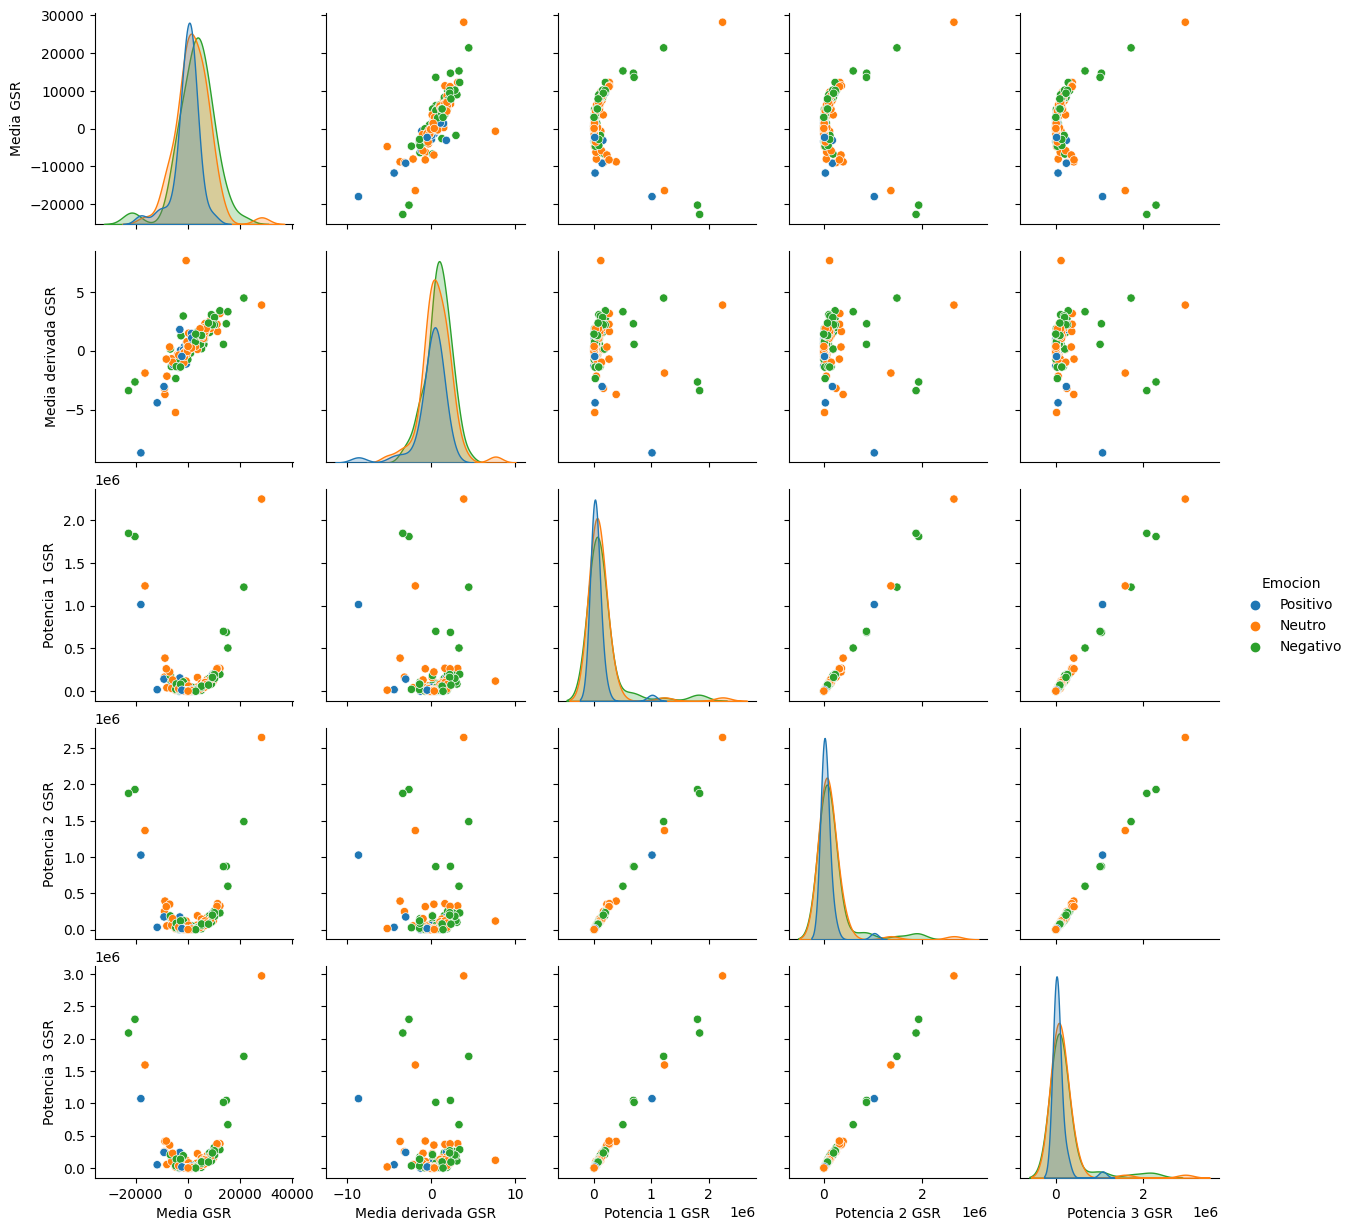

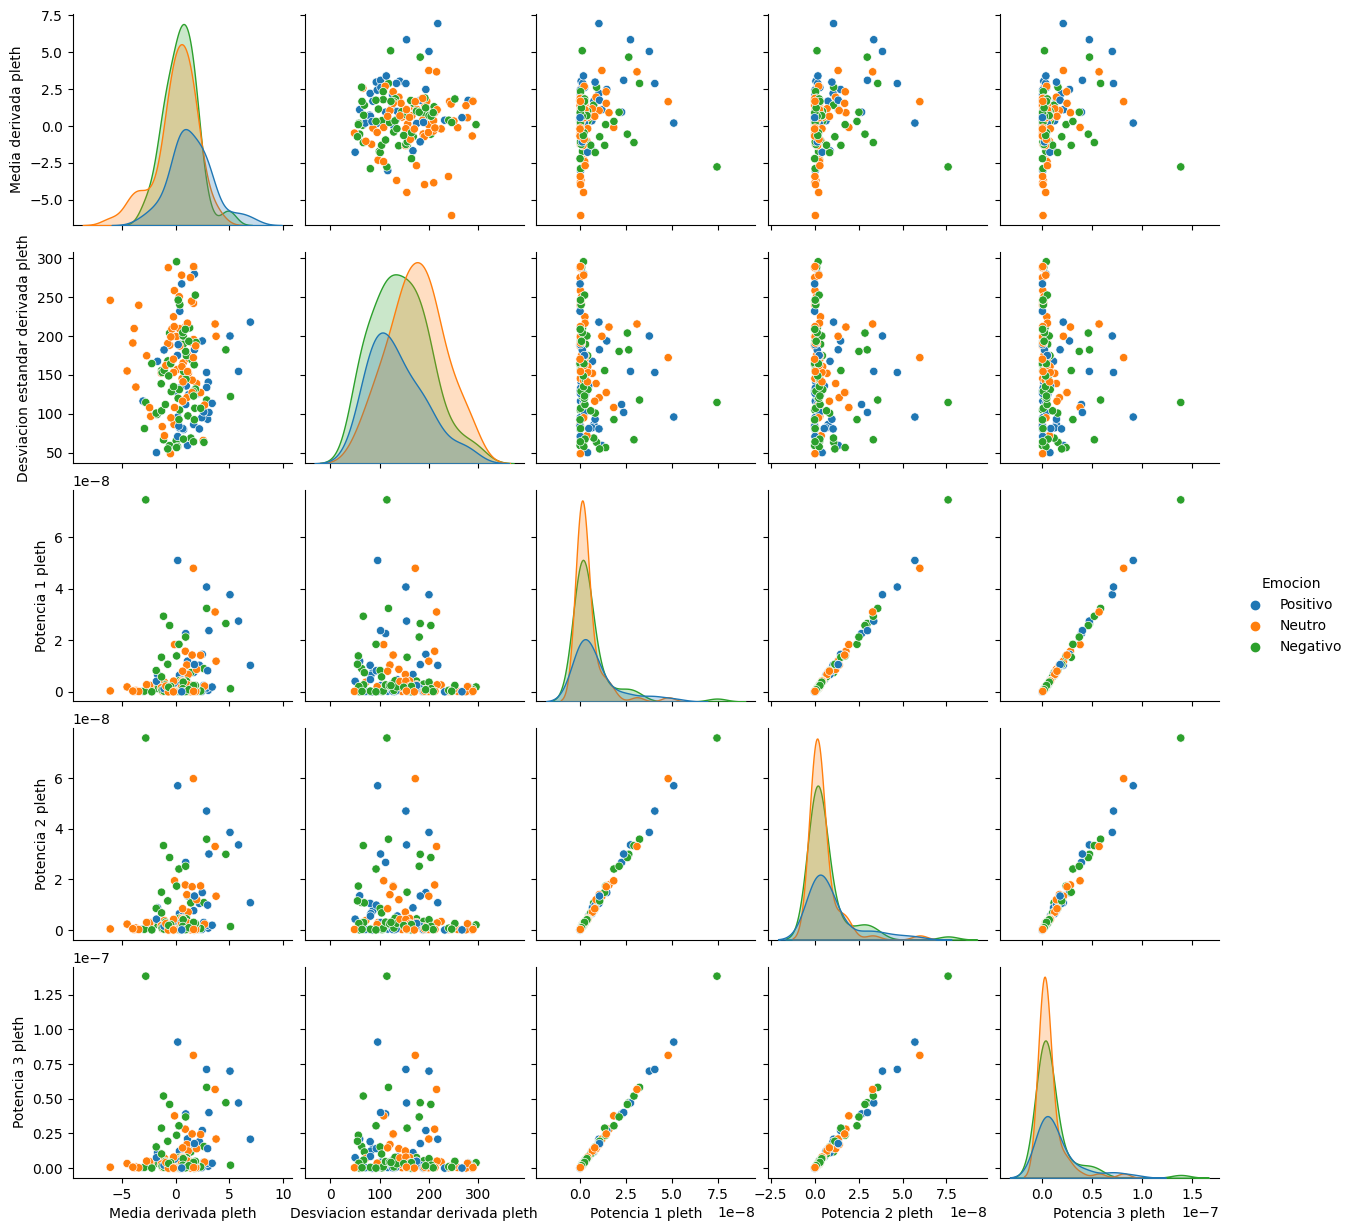

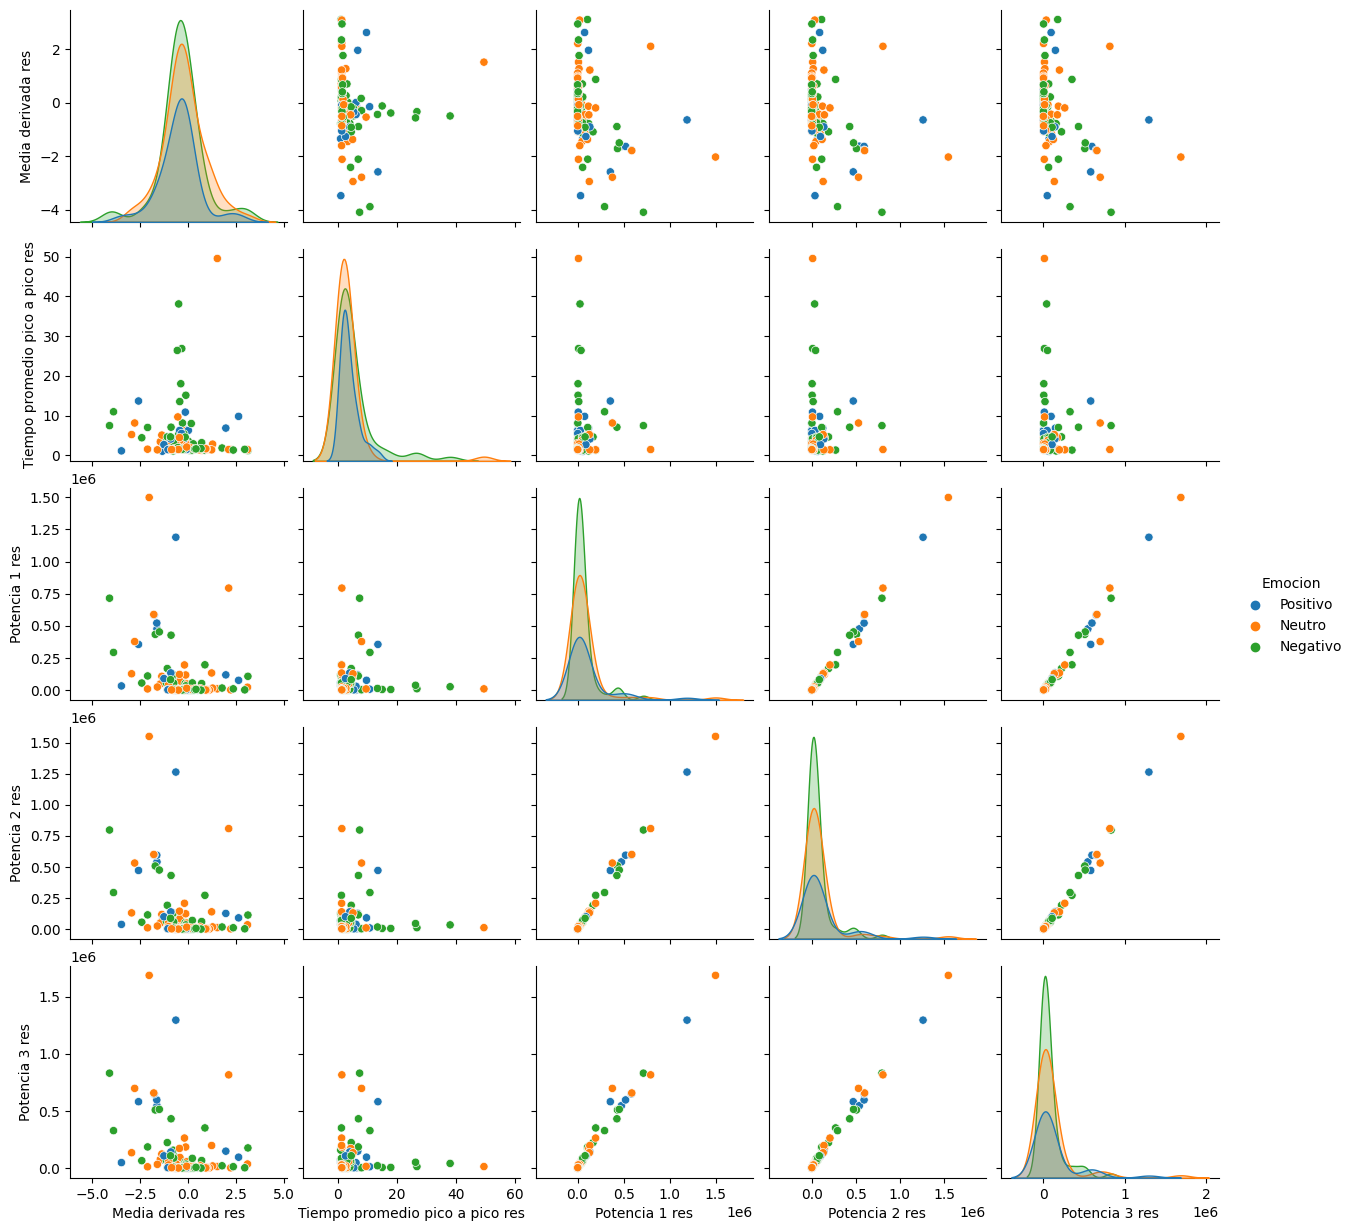

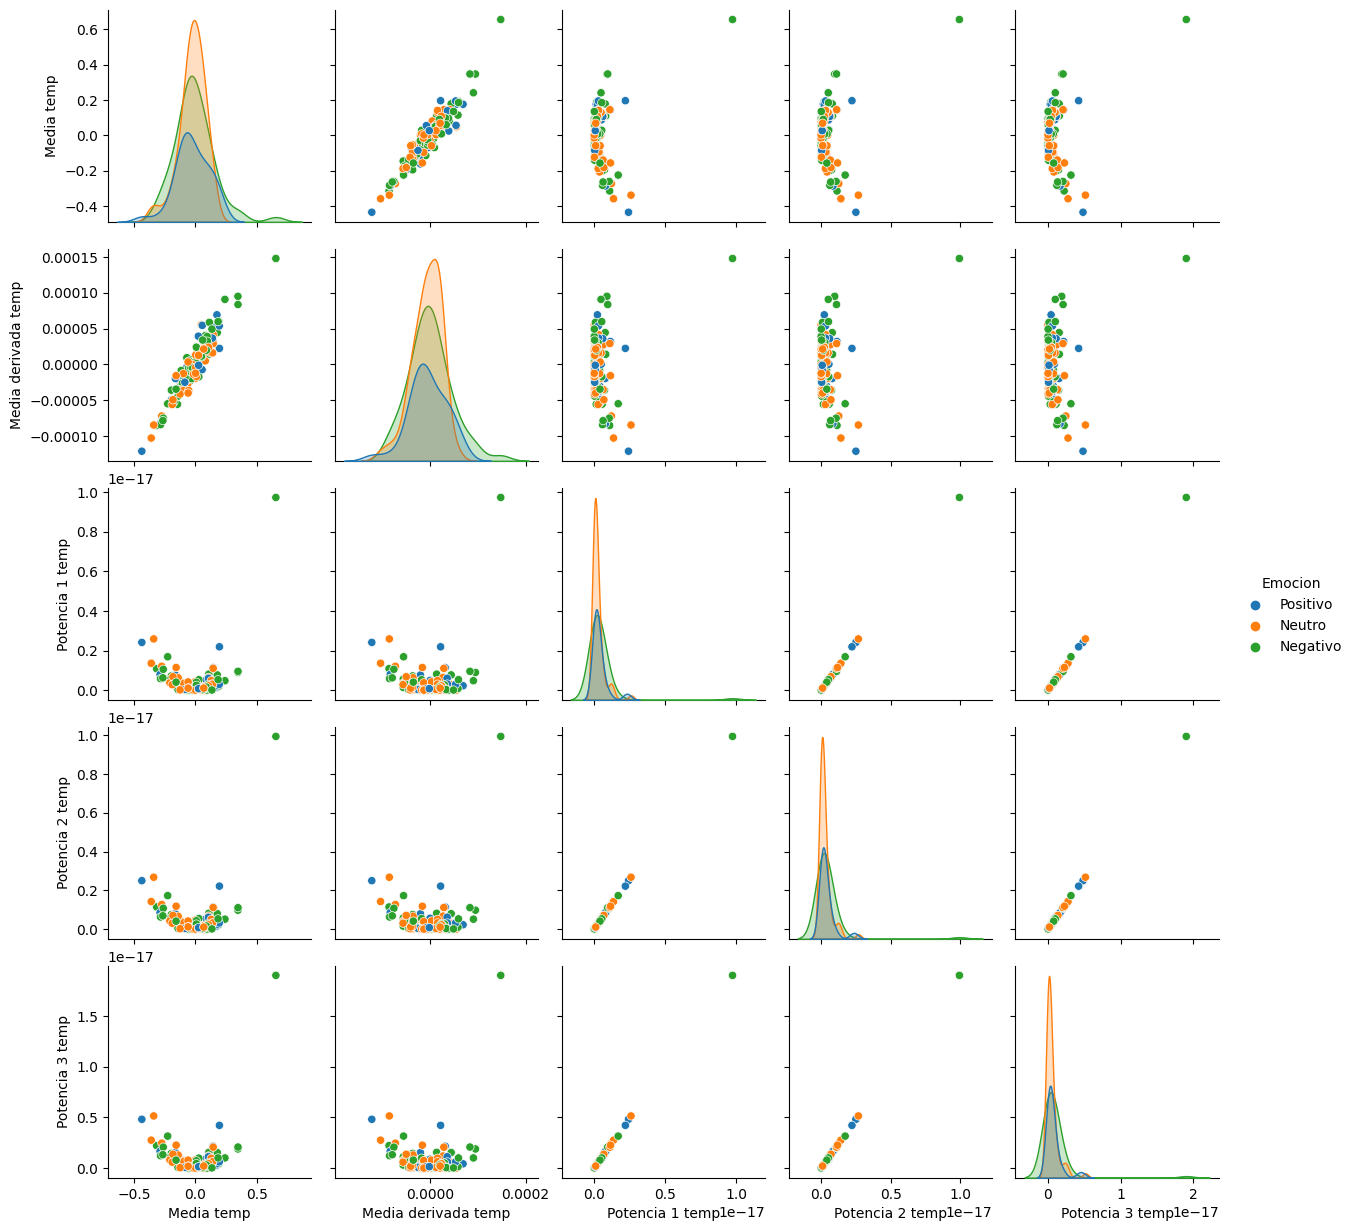

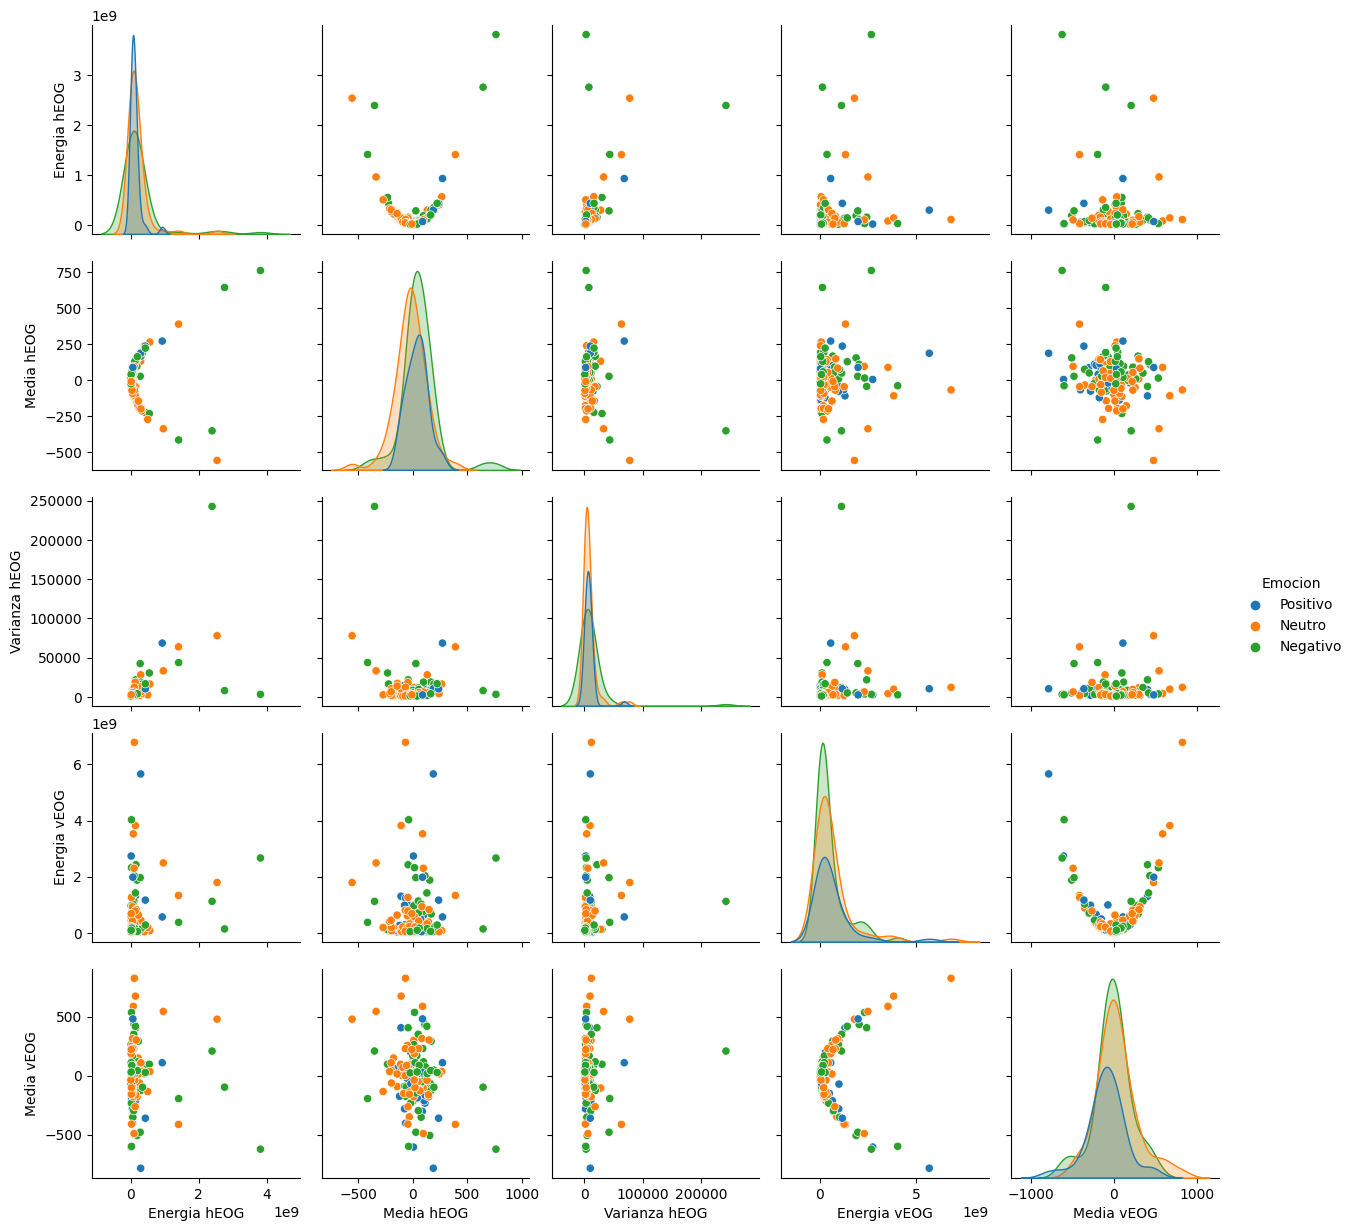

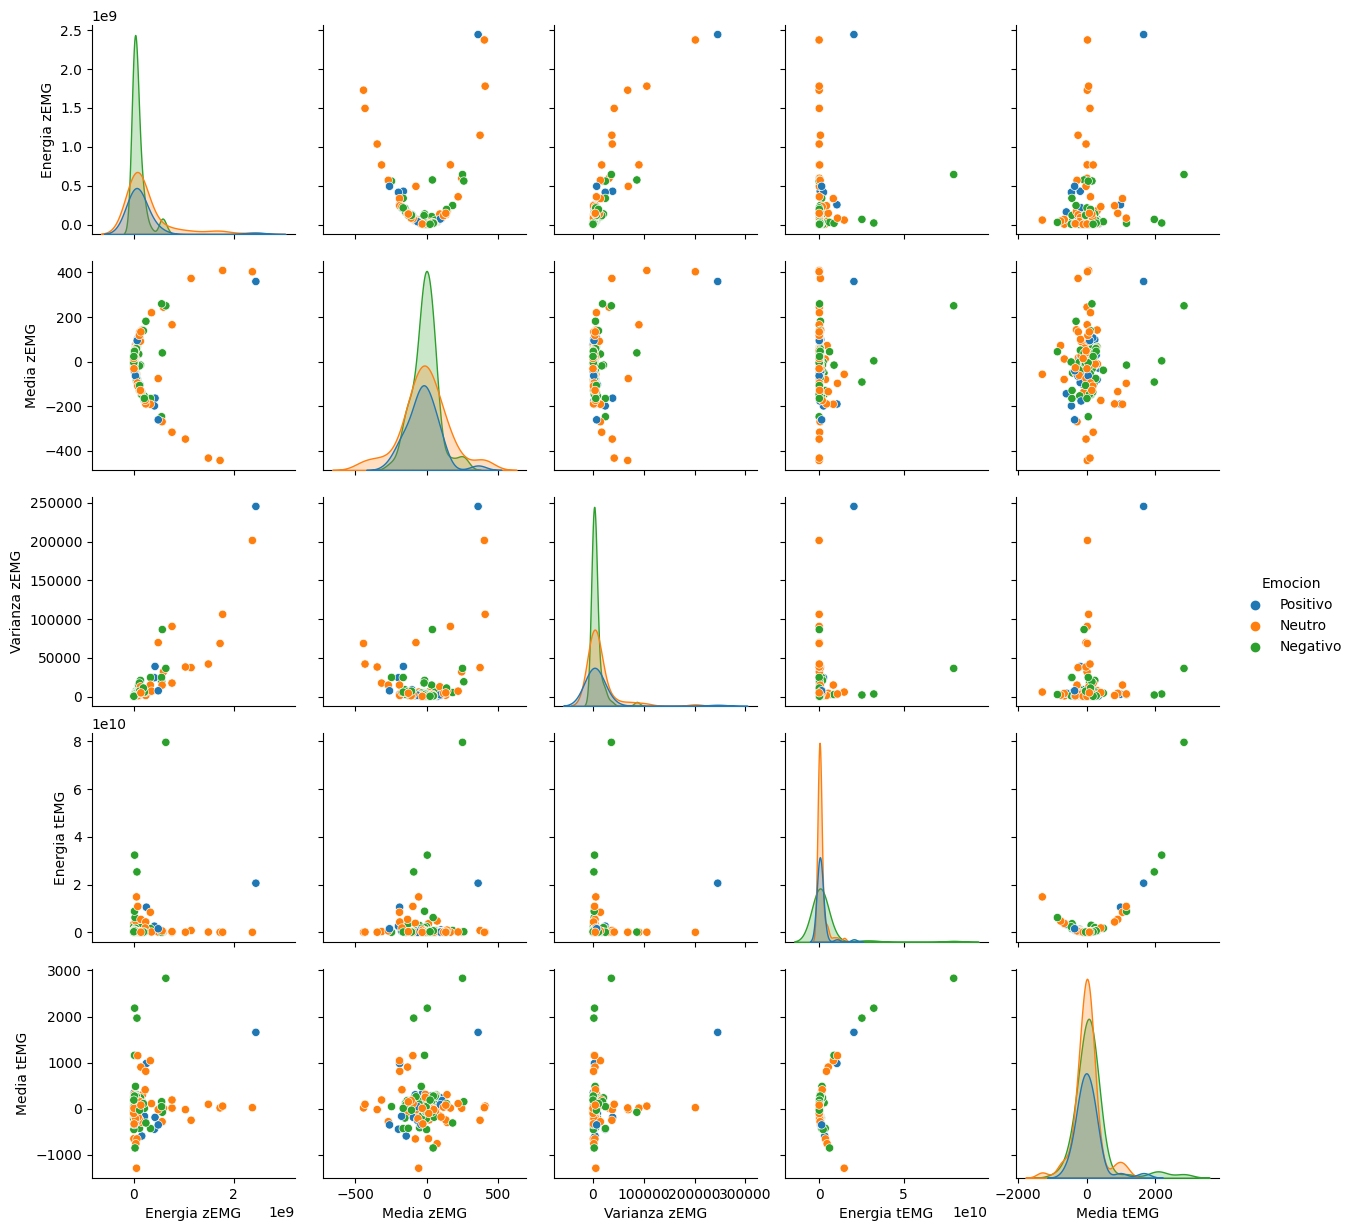

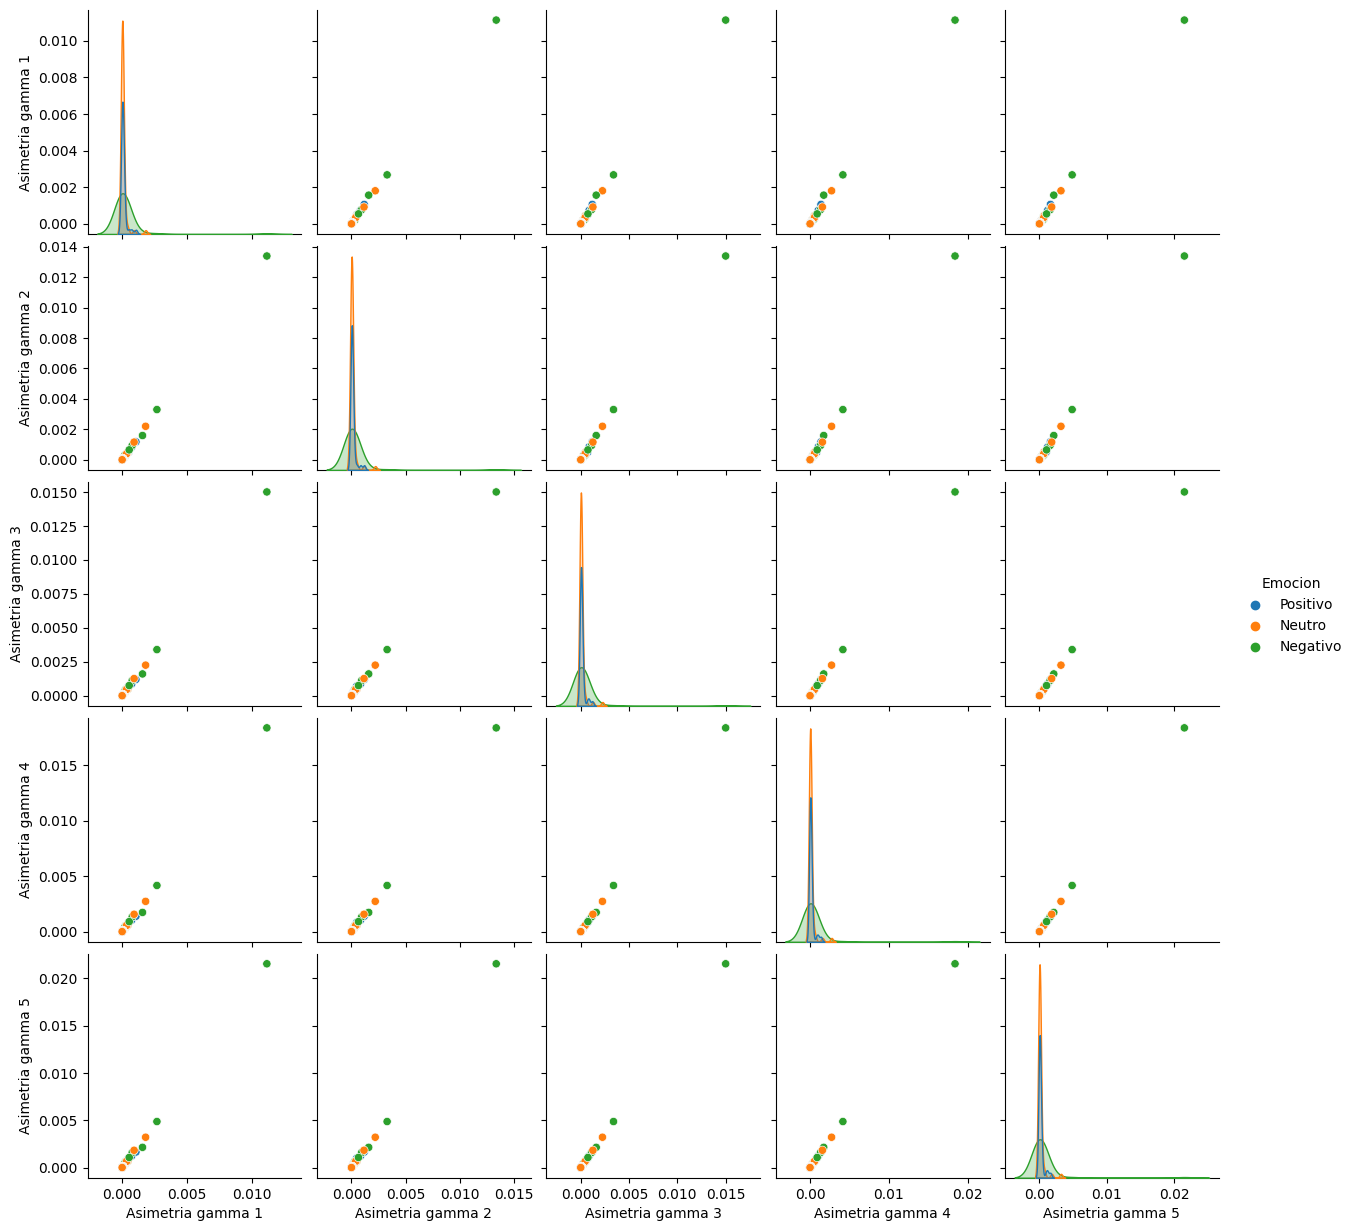

In [ ]:
cols=[1,15,27,39,51,57,83] #inicio de columnas a seleccionar para los pairplots

for i in range(7):
  section=datafull.iloc[:,[cols[i],cols[i]+1,cols[i]+2,cols[i]+3,cols[i]+4,93]]
  sns.pairplot(section,hue='Emocion')       #pairplots por secciones de 5 columnas

## **Análisis y conclusiones:**
> Para el siguiente análisis cabe aclarar que en cada punto mostrado en las gráficas de los pairplots se encuentran almacenadas mas de 60 características que necesitarían de otras maneras de filtrado para poder verse de una manera más detallada y así tener una predicción precisa.

> Una de las estrategias que podrían usarse sería establecer un umbral de decisión el cual separara de mejor manera tanto las características.

**En base a GSR:**

> En los datos estraidos del GSR se pueden analizar varios comportamientos que toman los datos en cuanto a su orden, en primera se podrían analizar las graficas en donde se analizan: *Media GSR vs Media GSR*, *Media derivada GSR vs Media derivada GSR*, *Potencias vs potencias*; en las anteriores gráficas puede verse que los datos situan sus puntos medios centrados en el 0 del eje x muy probablemente por la normalización de algunas frecuencias.

> También se tiene que destacar el comportamiento que toman otras gráficas, algunas mostrando un orden cuadrático en sus datos como por ejemplo: *Media GSR vs (Potencia GSR 1, Potencia GSR 2, Potencia GSR 3)*; esto quiere decir que las potencias extraidas de esas señales no estan siguiendo un orden lineal y por ende la relación entre las variables es cuadrática.

> En otras gráficas predomina un orden lineal en los datos como en las gráficas de las potencias con respecto a otras potencias; esto muestra que los valores del eje y aumentaron con respecto al aumento de los valores del eje x.

> Otro caso que puede encontrar es el de los datos que colapsan y se superponen entre si, por lo que establecer una relación y deducir los valores del "eje y" con respecto al "eje x" y viceversa es una tarea no posible con la resolución o forma de muestreo utilizada.

> También se debe resaltar la predomianncia de las emociones "negativas" en los datos mostrados, siendo la segunda mas predominante la emoción neutral, por lo que se podría decir que en esta características las personas están en su mayoría alteradas.

**En base a la Pletismografía:**

> En la pletismografía las gráficas muestran que los datos tienden  en su mayoría a dispersarse o sobreponerse unos con otros dificultando la relación de estos con respecto a otros como en los casos de: *Media derivada pleth vs derivación estandar deriavada pleth*, *desviación estandar derivada pleth vs media derivada pleth* y *potencia 1 pleth vs media derivada pleth*.

> Aun con lo anteriormente dicho hay gráficas cuyos datos tienden a imitar un comportamiento lineal, aunque los datos siguen superponiéndose o dispersándose en su mayoría tales como: *desviación estandar deriavda pleth vs potencia 1 pleth*, *potencias vs potencias*.

> En la pletismografía no es posible determinar que emoción es predominante.

**En base a Patrón de respiración:**

> En las gráficas de la respiración se ve una mayoría en cuanto al comportamiento lineal de los datos, unos siendo mas confiables que otros, por ejemplo: *las potencias vs las potencias*; cabe aclarar que aun quedan varias variables o datos dispersados los cuales hacen dificil establecer una relación entre ejes, tales como: *tiempo promedio pico a pico res vs media deriavda res*, * media derivada res vs potencia 3*.

> en general no puede verse ninguna gráfica que siga un orden cuadrático, por lo que si hay un cambio de los datos en cuanto a los ejes x, como un aumento o disminución, este se aplicará de esa manera en el eje y.

> las emociones mas predomiantes son las neutrales y las negativas, pero no se puede diferenciar entre ellas cual tiene mayor cantidad de datos presente.

**En base a la temperatura:**

> En la temperatura puede verse que los datos siguen órdenes cuadráticos como lineales, y hay muy poca dispersión en los datos aunque si puede visualizarse mucha superposición.

> Las gráficas en los que puede verse con mas claridad un comportamiento cuadrático por parte de los datos son: *potencias vs las medias temp y las medias derivadas temp*, aunque en las gráficas pertenecientes a: *media temp  vs potencias* se nota una tendencia al comportamiento cuadrático este se distorciona un poco haciéndolo ligeramente confuso.

> se puede visualizar de mejor manera la linealidad en la gráficas de: potencias vs potencias*.

> En la temperatura predominan las emociones neutrale so negativas, pero no se puede diferenciar entre ellas cual tiene la mayor cantidad de datos presente.

**En base a EOG:**

> En EOG los datos se muestran en su mayoría dispersos y desordenados, son contadas las gráficas que siguen un comportamiento cuadrático como: *Energia hEOG vs Media hEOG*, * Media hEOG vs energia EOG* y *Energia vEOG vs Media vEOG*.

> Las otras gráficas además de las anteriores mencionas buscan seguir un comportamiento lineal de manera superficial, pero gracias a la disperción de los datos se vueleve complecado asegurar esto y por ende establecer predicciones y demás.

> Cabe resaltar la predominancia de la emoción "neutra" a lo largo de esta característica, siendo la emoción "positva" la segunta mas presente en las gráficas, por lo que se podría decir que los resultados muestran un comportamiento tranquilo o incluso feliz.

**En base a EMG:**

>En EMG los datos siguen un comportamiento mayoritariamente disperso, aunque en algunos casos se intenta seguir un orden cuadrático como con: * Energía zEMG vs  media zEMG*, *media zEMG vs Energía zEMG*, entre otras, aun con esto, algunos datos dispersos dificultan asegurar el orden en el que se centran.

> En el resto de gráficas, aunque se ve similitudes con un orden lineal, la dispersión de los datos no permite asegurar esto y por ende, no establecer una dependencia segura de los datos.

> Se destaca la predominancia de emociones neutras y negativas, siendo la neutra la mas presente.

**En base a gamma:**

> En estas gráficas se situa las señales en una banda de 30-100Hz, y por lo que se puede ver estas siguen un orden lienal casi idéntico entre ellas; no se puede extraer mucha información de aquí.

> Lo último por destacar sería la predominancia de las emociones neutras o negativas.






Se puede observar que en todos los pairplots en la digonal principal las distribuciones por emocion se superponen entre ellas lo cual muestra que dificilmente podemos separar ciertas caracteristicas por algun umbral clasificados por emoción.

En conclusion se deben elegir ciertas caracteristicas que puedan propiciar información de interez y que supongan una ayuda a la hora de clasificar los resultados por emociones haciendo pairplots entre diferentes caractiristicas que muestren alguna dependencia o comportamiento relevnte que permita agrupar de mejor manera los datos.